In [1]:
# Importy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [2]:
# Czcionka
rc('font',family='Comic Sans MS')

In [3]:
# Definicja impedancji
def Z(omega,R,C,L):
    Z = R + 1j*(omega*L - (1/omega*C))
    return Z
def Z_sq(omega,R,C,L):
    ZZ = R**2 + (omega*L - (1/omega*C))**2
    return ZZ

In [4]:
#Szeregowy układ - ładowanie danych
Cze33 = pd.read_csv(f"./Dane/BodeSimulator33.txt",sep=r'\s*', skiprows=3, header=None, decimal=',')
Cze130 = pd.read_csv(f"./Dane/BodeSimulator130.txt",sep=r'\s*', skiprows=3, header=None, decimal=',')
Cze130.columns = ["Elv_Freq(Hz)","Elv_Gain(dB)","Elv_Phase(deg)","Sym_Freq(Hz)","Sym_Gain(dB)","Sym_Phase(deg)"]
Cze33.columns = ["Elv_Freq(Hz)","Elv_Gain(dB)","Elv_Phase(deg)","Sym_Freq(Hz)","Sym_Gain(dB)","Sym_Phase(deg)"]
Cze33['Elv_Freq(kHz)'] = Cze33['Elv_Freq(Hz)'] / 1e3
Cze130['Elv_Freq(kHz)'] = Cze130['Elv_Freq(Hz)'] / 1e3
Cze33['Elv_Gain'] = np.exp(Cze33['Elv_Gain(dB)'] / 20)
Cze130['Elv_Gain'] = np.exp(Cze130['Elv_Gain(dB)'] / 20)
Cze33['Sym_Freq(kHz)'] = Cze33['Sym_Freq(Hz)'] / 1e3
Cze130['Sym_Freq(kHz)'] = Cze130['Sym_Freq(Hz)'] / 1e3
Cze33['Sym_Gain'] = np.exp(Cze33['Sym_Gain(dB)'] / 20)
Cze130['Sym_Gain'] = np.exp(Cze130['Sym_Gain(dB)'] / 20)

/home/paulina/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/paulina/.anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2138: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/paulina/.anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2140: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/paulina/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate fr

In [5]:
# Parametry układu do wykresów
F_0_33 = Cze33[Cze33['Elv_Gain(dB)'] == max(Cze33['Elv_Gain(dB)'])]
F_0_130 = Cze130[Cze130['Elv_Gain(dB)'] == max(Cze130['Elv_Gain(dB)'])]
f_0 = (float(F_0_33['Elv_Freq(Hz)']) + float(F_0_130['Elv_Freq(Hz)'])) / 2
f_0
U = 1
L = 18e-3
C = 10e-9

Szerokość połówkowa: 922.2 Hz
Dobroć: 0.02694


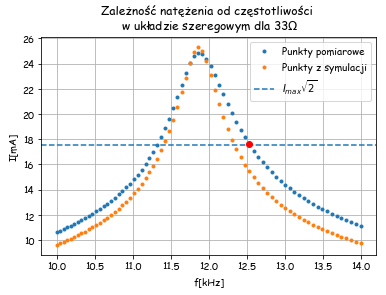

In [9]:
# Układ szeregowy z opornikiem 33 omy
i1=27; i2 = 49
R = 33
Cze33['Elv_I(mA)'] = (U*Cze33['Elv_Gain']/Z(Cze33['Elv_Freq(Hz)'],R,L,C)).real * 1e3 #W mA
Cze33['Sym_I(mA)'] = (U*Cze33['Sym_Gain']/Z(Cze33['Sym_Freq(Hz)'],R,L,C)).real * 1e3 #w mA
# wysokosc_polowkowa_33 = (max(Cze33['Elv_I(mA)'])-min(Cze33['Elv_I(mA)']))/np.sqrt(2) + min(Cze33['Elv_I(mA)'])
wysokosc_polowkowa_33 = max(Cze33['Elv_I(mA)']) / np.sqrt(2)
punkty_polowkowe_33 = Cze33.loc[[i1,i2]]
szerokosc_polowkowa_33 = punkty_polowkowe_33.loc[i2,'Elv_Freq(Hz)'] - punkty_polowkowe_33.loc[i1,'Elv_Freq(Hz)']
dobroc_33 = max(Cze33['Elv_I(mA)'])/szerokosc_polowkowa_33
plt.plot(Cze33['Elv_Freq(kHz)'],Cze33['Elv_I(mA)'],'.',label = 'Punkty pomiarowe')
plt.plot(Cze33['Sym_Freq(kHz)'],Cze33['Sym_I(mA)'],'.',label = 'Punkty z symulacji')
plt.axhline(wysokosc_polowkowa_33,ls = 'dashed',label='$I_{max}\sqrt{2}$')
plt.xlabel('f[kHz]')
plt.ylabel('I[mA]')
plt.grid()
plt.title('Zależność natężenia od częstotliwości \n w układzie szeregowym dla 33$\Omega$')
plt.legend()
plt.savefig('Bode33.png',dpi=400)
print(f"Szerokość połówkowa: {szerokosc_polowkowa_33:.4} Hz")
print(f"Dobroć: {dobroc_33:.4}")

Szerokość połówkowa: 2810.7 Hz
Dobroć: 0.002576


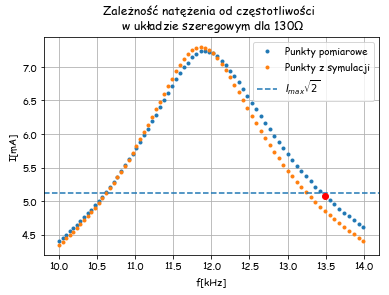

In [16]:
# Układ szeregowy z opornikiem 130 omów
i1=13; i2 = 64
R = 130
Cze130['Elv_I(mA)'] = (U*Cze130['Elv_Gain']/Z(Cze130['Elv_Freq(Hz)'],R,L,C)).real * 1e3 #W mA
Cze130['Sym_I(mA)'] = (U*Cze130['Sym_Gain']/Z(Cze130['Sym_Freq(Hz)'],R,L,C)).real * 1e3 #w mA
# wysokosc_polowkowa_130 = (max(Cze130['Elv_I(mA)'])-min(Cze130['Elv_I(mA)']))/np.sqrt(2) + min(Cze130['Elv_I(mA)'])
wysokosc_polowkowa_130 = max(Cze130['Elv_I(mA)']) / np.sqrt(2)
punkty_polowkowe_130 = Cze130.loc[[i1,i2]]
szerokosc_polowkowa_130 = punkty_polowkowe_130.loc[i2,'Elv_Freq(Hz)'] - punkty_polowkowe_130.loc[i1,'Elv_Freq(Hz)']
dobroc_130 = max(Cze130['Elv_I(mA)'])/szerokosc_polowkowa_130
plt.plot(Cze130['Elv_Freq(kHz)'],Cze130['Elv_I(mA)'],'.',label = 'Punkty pomiarowe')
plt.plot(Cze130['Sym_Freq(kHz)'],Cze130['Sym_I(mA)'],'.',label = 'Punkty z symulacji')
plt.axhline(wysokosc_polowkowa_130,ls = 'dashed',label='$I_{max}\sqrt{2}$')
plt.plot(Cze130.loc[i,'Elv_Freq(kHz)'],Cze130.loc[i,'Elv_I(mA)'],'ro')
plt.xlabel('f[kHz]')
plt.ylabel('I[mA]')
plt.grid()
plt.legend()
plt.title('Zależność natężenia od częstotliwości \n w układzie szeregowym dla 130$\Omega$')
plt.savefig('Bode130.png',dpi=400)
print(f"Szerokość połówkowa: {szerokosc_polowkowa_130:.5} Hz")
print(f"Dobroć: {dobroc_130:.4}")

In [17]:
C = 10e-9
L = 18e-3
R_33 = 33
U = 1
omega_0_33 = int(F_0_33['Elv_Freq(Hz)']) * 2 * np.pi
R_g = 50
L_33 = 1 / C / omega_0_33**2
Q_L_33 = (dobroc_33**(-1) - omega_0_33*C*(R_g + R_33))**(-1)
r_L_33 = omega_0_33*L/Q_L_33

R_130 = 130
omega_0_130 = int(F_0_130['Elv_Freq(Hz)']) * 2 * np.pi
L_130 = 1 / C / omega_0_130**2
Q_L_130 = (dobroc_33**(-1) - omega_0_130*C*(R_g + R_130))**(-1)
r_L_130 = omega_0_130*L/Q_L_130

L = (L_33 + L_130)/2
Q_L = (Q_L_33 + Q_L_130)/2
r_L = (r_L_33 + r_L_130)/2
print(f"Indukcyjność cewki: {L*1e3}mH")
print(f"Oporność cewki: {r_L}")
print(f"Dobroć cewki: {Q_L}")

Indukcyjność cewki: 17.93434043332668mH
Oporność cewki: 49766.17559569422
Dobroć cewki: 0.02700837484300842


/home/paulina/.anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2138: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/paulina/.anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2140: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


Szerokość połówkowa: 768.15 Hz
Dobroć: 0.001123


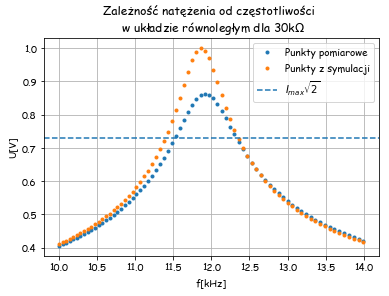

In [9]:
ElvCze30 = pd.read_csv(f"./Dane/BodeElvis30.txt",sep=r'\s*', skiprows=3, header=None, decimal=',',engine='python')
ElvCze30.columns = ["Freq(Hz)","Gain(dB)","Phase(deg)"]
ElvCze30['Gain'] = np.exp(ElvCze30['Gain(dB)'] / 20)
ElvCze30['Freq(kHz)'] = ElvCze30['Freq(Hz)'] / 1e3
SymCze30 = pd.read_csv(f"./Dane/BodeSimulator30.txt",sep=r'\s*', skiprows=3, header=None, decimal=',',engine='python')
SymCze30.columns = ["Freq(Hz)","Gain(dB)","Phase(deg)"]
SymCze30['Gain'] = np.exp(SymCze30['Gain(dB)'] / 20)
SymCze30['Freq(kHz)'] = SymCze30['Freq(Hz)'] / 1e3
ElvCze30['U'] = U*ElvCze30['Gain']
SymCze30['U'] = U*SymCze30['Gain']
wysokosc_polowkowa_30 = (max(ElvCze30['U'])-min(ElvCze30['U']))/np.sqrt(2) + min(ElvCze30['U'])
punkty_polowkowe_30 = ElvCze30.loc[[31,45]]
szerokosc_polowkowa_30 = punkty_polowkowe_30.loc[45,'Freq(Hz)'] - punkty_polowkowe_30.loc[31,'Freq(Hz)']
dobroc_30 = max(ElvCze30['U'])/szerokosc_polowkowa_30
plt.plot(ElvCze30['Freq(kHz)'],ElvCze30['U'],'.',label = 'Punkty pomiarowe')
plt.plot(SymCze30['Freq(kHz)'],SymCze30['U'],'.',label = 'Punkty z symulacji')
plt.axhline(wysokosc_polowkowa_30,ls = 'dashed',label='$I_{max}\sqrt{2}$')
plt.xlabel('f[kHz]')
plt.ylabel('U[V]')
plt.grid()
plt.legend()
plt.title('Zależność natężenia od częstotliwości \n w układzie równoległym dla 30k$\Omega$')
plt.savefig('Bode30.png',dpi=400)
print(f"Szerokość połówkowa: {szerokosc_polowkowa_30:.5} Hz")
print(f"Dobroć: {dobroc_30:.4}")

/home/paulina/.anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2138: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/paulina/.anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2140: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


Szerokość połówkowa: 1317.3 Hz
Dobroć: 0.0007183


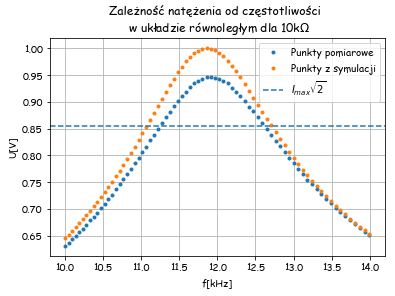

In [10]:
ElvCze10 = pd.read_csv(f"./Dane/BodeElvis10.txt",sep=r'\s*', skiprows=3, header=None, decimal=',',engine='python')
ElvCze10.columns = ["Freq(Hz)","Gain(dB)","Phase(deg)"]
ElvCze10['Gain'] = np.exp(ElvCze10['Gain(dB)'] / 20)
ElvCze10['Freq(kHz)'] = ElvCze10['Freq(Hz)'] / 1e3
SymCze10 = pd.read_csv(f"./Dane/BodeSimulator10.txt",sep=r'\s*', skiprows=3, header=None, decimal=',',engine='python')
SymCze10.columns = ["Freq(Hz)","Gain(dB)","Phase(deg)"]
SymCze10['Gain'] = np.exp(SymCze10['Gain(dB)'] / 20)
SymCze10['Freq(kHz)'] = SymCze10['Freq(Hz)'] / 1e3
ElvCze10['U'] = U*ElvCze10['Gain']
SymCze10['U'] = U*SymCze10['Gain']
wysokosc_polowkowa_10 = (max(ElvCze10['U'])-min(ElvCze10['U']))/np.sqrt(2) + min(ElvCze10['U'])
punkty_polowkowe_10 = ElvCze10.loc[[26,50]]
szerokosc_polowkowa_10 = punkty_polowkowe_10.loc[50,'Freq(Hz)'] - punkty_polowkowe_10.loc[26,'Freq(Hz)']
dobroc_10 = max(ElvCze10['U'])/szerokosc_polowkowa_10
plt.plot(ElvCze10['Freq(kHz)'],ElvCze10['U'],'.',label = 'Punkty pomiarowe')
plt.plot(SymCze10['Freq(kHz)'],SymCze10['U'],'.',label = 'Punkty z symulacji')
plt.axhline(wysokosc_polowkowa_10,ls = 'dashed',label='$I_{max}\sqrt{2}$')
# plt.plot(ElvCze10.loc[i,'Freq(kHz)'],ElvCze10.loc[i,'U'],'ro')
plt.xlabel('f[kHz]')
plt.ylabel('U[V]')
plt.grid()
plt.legend()
plt.title('Zależność natężenia od częstotliwości \n w układzie równoległym dla 10k$\Omega$')
plt.savefig('Bode10.png',dpi=400)
print(f"Szerokość połówkowa: {szerokosc_polowkowa_10:.5} Hz")
print(f"Dobroć: {dobroc_10:.4}")

/home/paulina/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


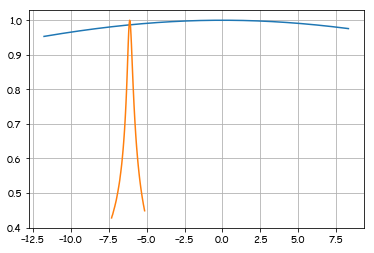

In [18]:
f = np.linspace(1e3,1e5,1e5)
omega = f * 2 * np.pi
def ni(omega,omega_0):
    return omega/omega_0 - omega_0/omega
def y(Q,ni):
    return 1/np.sqrt(1+Q**2*ni**2)
plt.plot(ni(omega,omega_0_33),y(dobroc_33,ni(omega,omega_0_33)))
plt.plot(ni(Cze33['Elv_Freq(Hz)'],omega_0_33),Cze33['Elv_I(mA)']/max(Cze33['Elv_I(mA)']))
plt.grid()

In [46]:
def furier_pros(U,n):
    k = 2*n - 1
    return 4*np.pi*U/k

/home/paulina/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/paulina/.anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2138: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/paulina/.anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2140: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


Amplituda: 462.4 	 Furier: 12.566
Amplituda: 28.63 	 Furier: 4.1888
Amplituda: 172.2 	 Furier: 2.5133
Amplituda: 284.2 	 Furier: 12.566
Amplituda: 33.05 	 Furier: 4.1888
Amplituda: 112.7 	 Furier: 2.5133


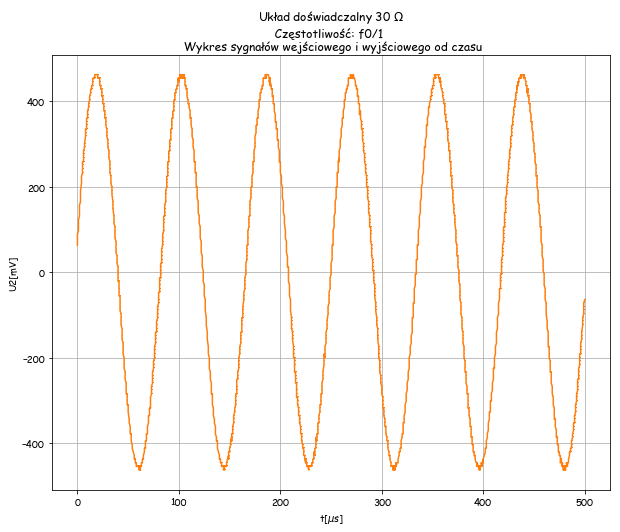

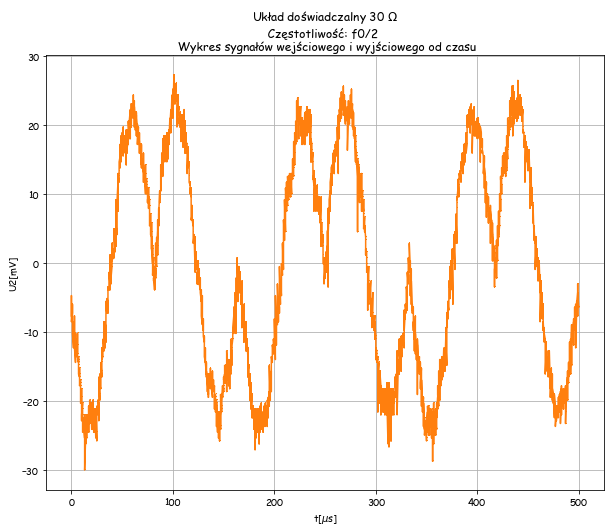

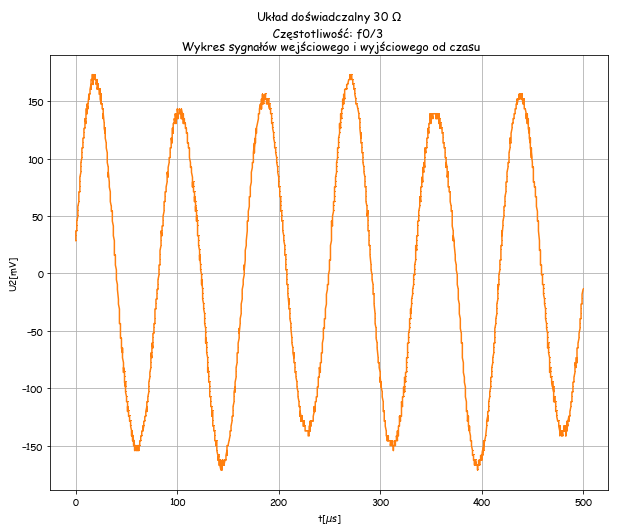

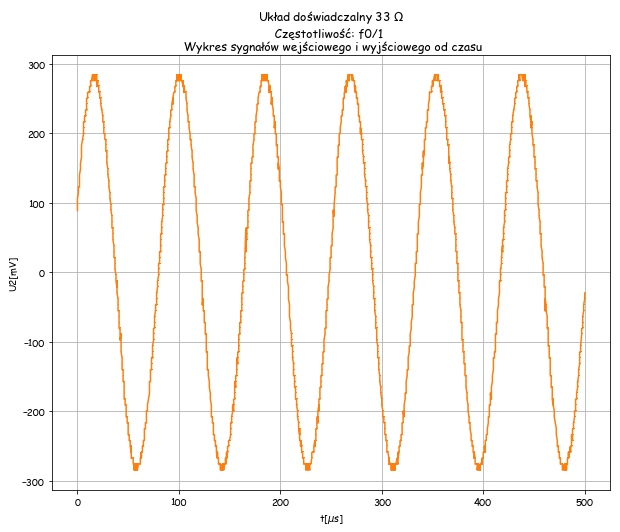

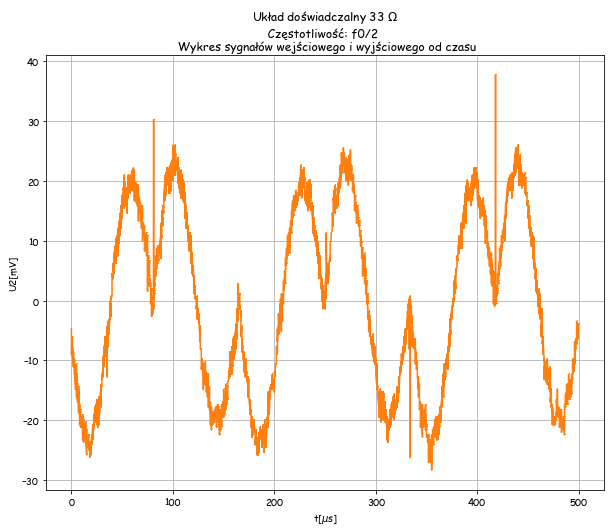

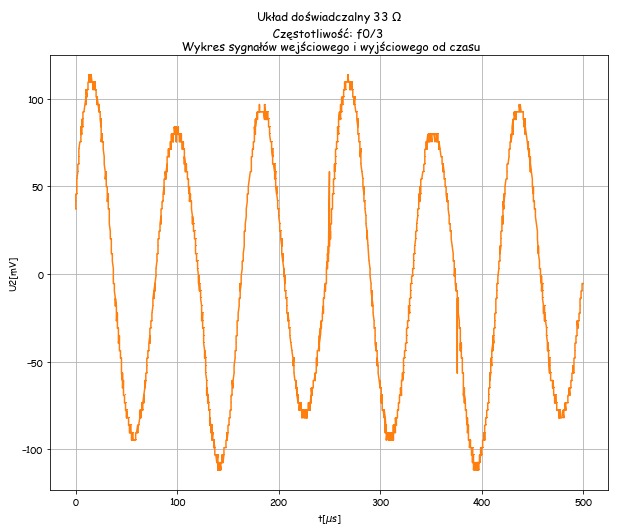

In [57]:
for R in [30,33]:
    for i in [1,2,3]:
        Osci = pd.read_csv(f"./Dane/OsciElvis{R}_{i}.txt",sep=r'\s*', skiprows=5, header=None, parse_dates=[[0,1],[3,4]])
        Osci.columns = ["time0","time1","y0",'y1']
        Osci['y0'] = pd.to_numeric(Osci['y0'].str.replace(',','.'))*1e3 #w mV
        Osci['y1'] = pd.to_numeric(Osci['y1'].str.replace(',','.'))*1e3 #w mV
        f = float(F_0_33['Elv_Freq(Hz)'])/i
        
        plt.figure(figsize=(10,8))
        plt.plot((Osci['time1']-Osci['time1'].iloc[0])/1e3,Osci['y1'],',-C1',label='$U_2$')
        plt.grid()
        plt.title(f"Układ doświadczalny {R} $\Omega$ \n Częstotliwość: f0/{i}  \n Wykres sygnałów wejściowego i wyjściowego od czasu")
        plt.xlabel(r"t[$\mu $s]")
        plt.ylabel("U2[mV]")
        plt.savefig(f'Osci{R}_{i}')
        
        amplituda = (max(Osci['y1'])-min(Osci['y1']))/2
        print(f"Amplituda: {amplituda:.4} \t Furier: {furier_pros(1,i):.5}")